In [2]:
from bonsai.visualizer import *
import time
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100
plt.style.use('material')

%load_ext autoreload
%autoreload 2

# Prune Visualization

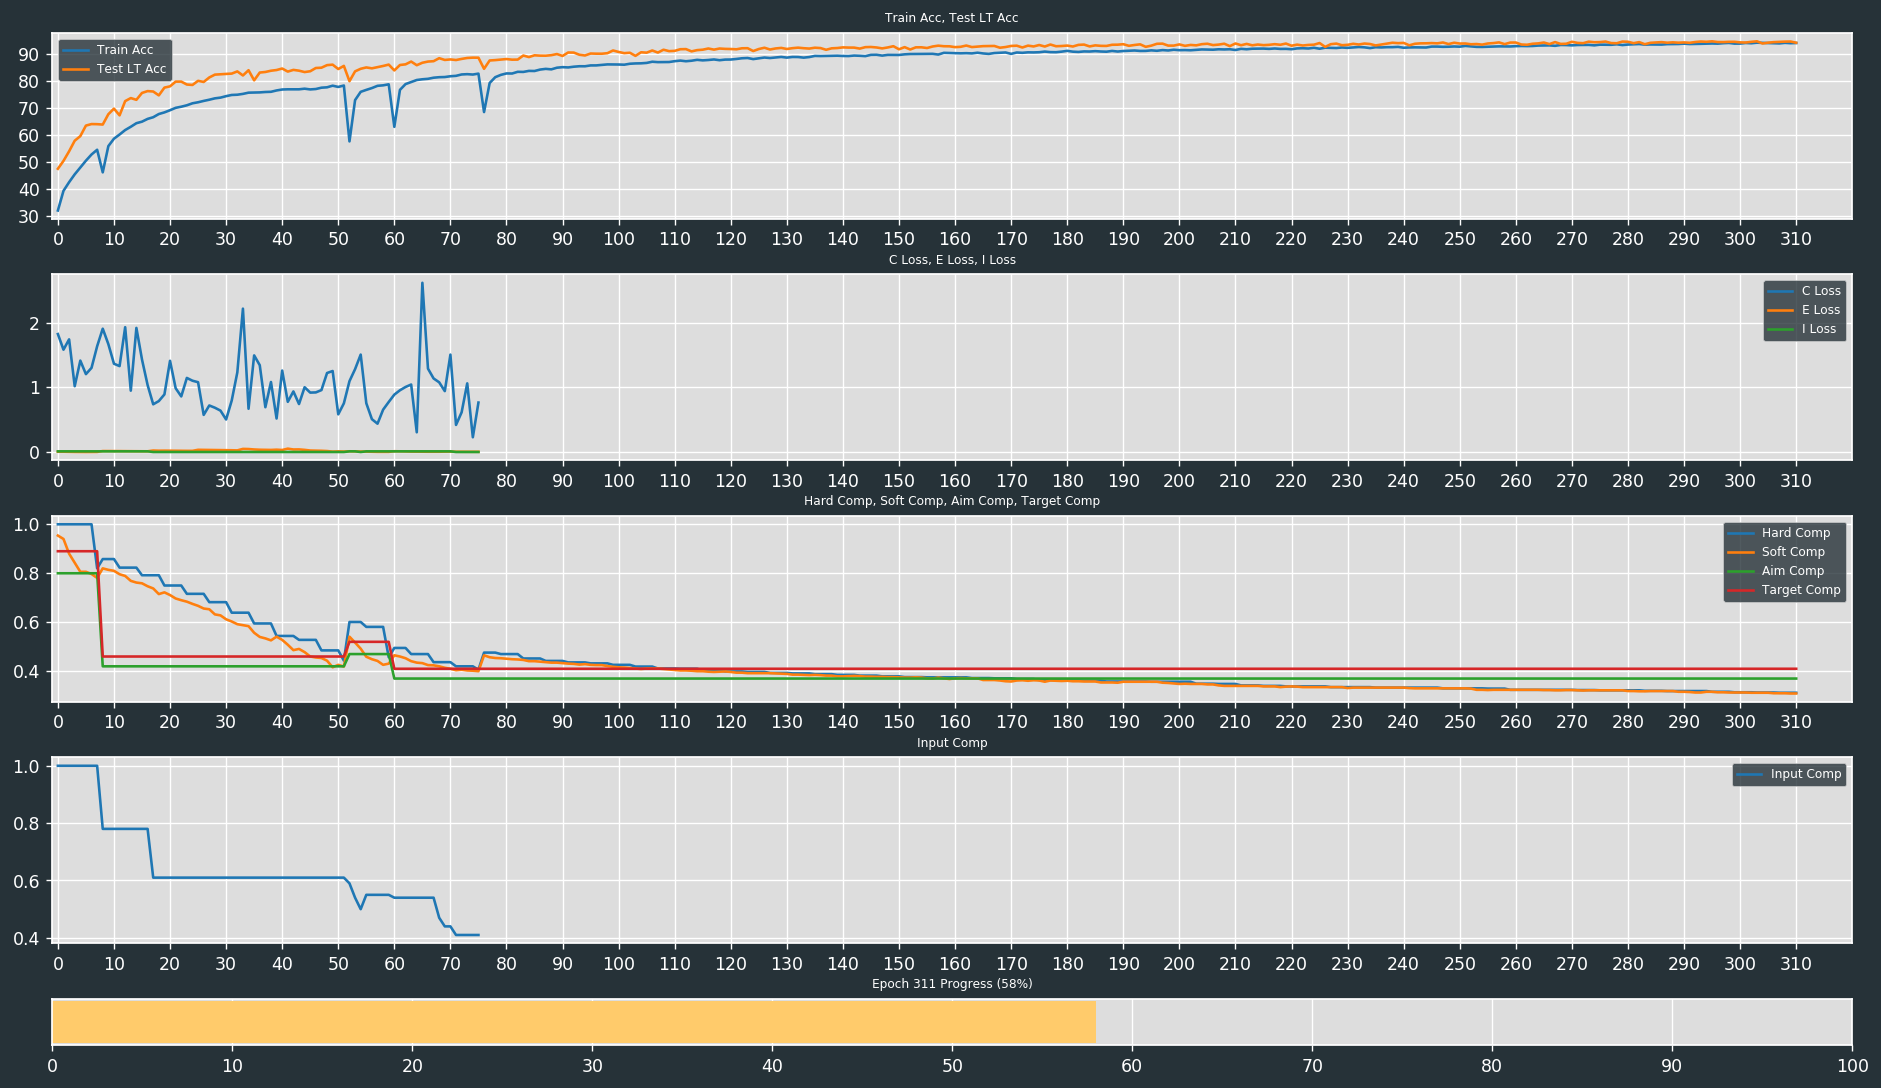

KeyboardInterrupt: 

In [4]:
PrunePlot((16,9)).monitor()

# Train Visualization

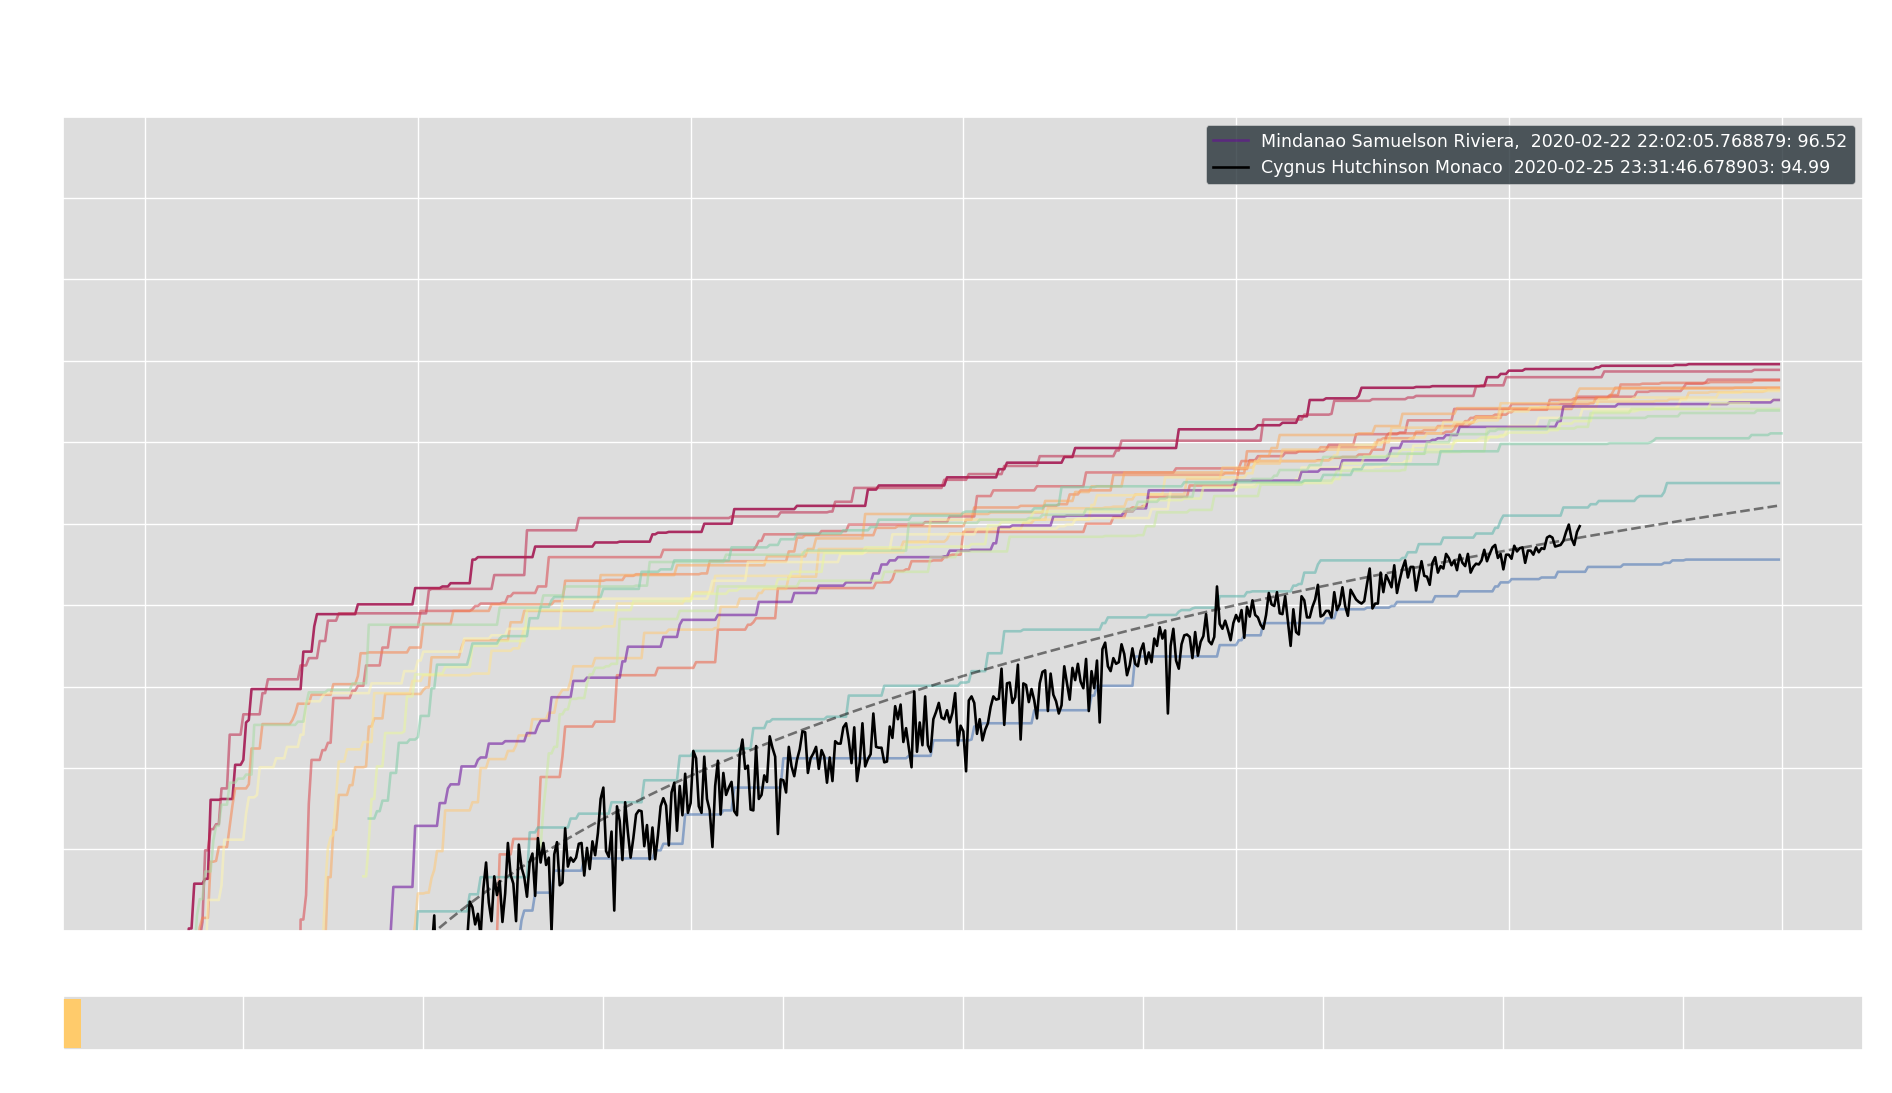

In [ ]:
TrainPlot('Mindanao Samuelson Riviera', (16,9)).monitor()

# Jupyter Notebook Output

In [25]:
with open('logs/jn_out.log',"r") as f:
    lines = f.readlines()
out = ""
for i,line in enumerate(lines):
    if "|carr_ret|" not in line:
        out+=line
print(out)

== Determining compression ratios ==
Comp Ratios:
sizes={
    1:0.8928571428571428,
    2:0.46428571428571425,
    3:0.5178571428571428,
    4:0.4107142857142857,
}
start_size=1
Effective Scale: 103.50
=========================== NETWORK ===========================
================= Mindanao Samuelson Riviera ==================
                     :     Dim      :    Params    :   Comp   
Initializer          :              :     180      :          
Cell 0  (Normal)     :   36 x 32    :   167,859    :  100.0%  
Cell 1  (Normal)     :   36 x 32    :   167,860    :  100.0%  
 ↳ Classifier        :              :   368,650    :          
Total                :              :   704,549    :  100.0%  

=== 1 Patterns. Target Comp: 0.89, Aim: 0.80
Starting at 2020-02-22 11:00:10.888694
02/22/2020 11:00 AM
Init:   24.00MiB
0:    3.73GiB
1:    7.23GiB
GP:    7.23GiB
Classifier:    7.23GiB
Train Epoch: 0   [12512 /50000  (100%)]	Comp Ratio: [E: 0.954, I: 1.000], Loss Comp: [C: 1.825, E: 0.004

In [23]:
print(1-.893,1-.464,1-.518,1-.411,1-.284)
print(1-.6408,1-.8605,1-.8607,1-.8864,1-.9652)

0.10699999999999998 0.536 0.482 0.589 0.716
0.35919999999999996 0.13949999999999996 0.13929999999999998 0.11360000000000003 0.03480000000000005


# Specific Comparisons

In [21]:
def total_time(t_str):
    h,m,s=0,0,0
    orig=t_str
    if 'h' in t_str:
        h = int(t_str.split("h")[0])
        t_str = t_str.split(",",1)[1]
    if 'm' in t_str:
        m = int(t_str.split("m")[0])
        t_str = t_str.split(",",1)[1]
    if 's' in t_str:
        s = int(t_str.split("s")[0])
    print(orig,h*60*60+m*60+s)
    return h*60*60+m*60+s

df = proc_all_runs()
df = df[df['Start Time'].apply(lambda x: '2020-02' in x)]

df = df[df['ID'].apply(lambda x: 'Mindanao' in x)]
print(df['Epochs'].apply(len))
print(df['LT Test Top-1 Max'])
show_time(df['Total_Train_Time'].apply(total_time).sum())

3600      8
3601     44
3602      8
3603     16
3604    524
Name: Epochs, dtype: int64
3600    64.08
3601    86.05
3602    86.07
3603    88.64
3604    96.52
Name: LT Test Top-1 Max, dtype: float64
1h,0m,15s 3615
5h,33m,54s 20034
1h,21m,59s 4919
2h,39m,34s 9574
70h,20m,18s 253218


'80h,56m,0s'

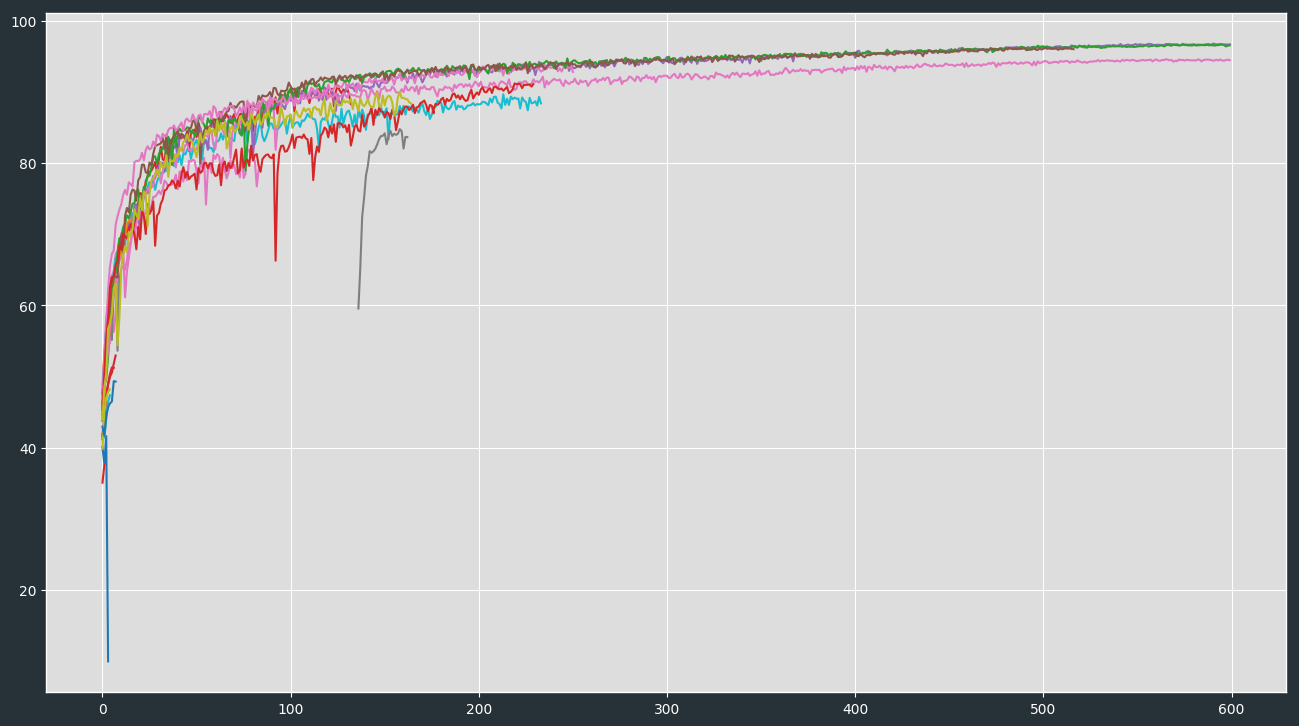

In [8]:
df = proc_all_runs()
df = df[df['Start Time'].apply(lambda x: '2020-02' in x)]
df = df.groupby('ID')['Epochs','LT Test Top-1','Start Time','LT Test Top-1 Max'].agg(list)
df['Epochs'] = df['Epochs'].apply(lambda x: [sub for l in x for sub in l])
df['LT Test Top-1'] = df['LT Test Top-1'].apply(lambda x: [sub for l in x for sub in l])
df['LT Test Top-1 Max'] = df['LT Test Top-1 Max'].apply(max)
for idx,row in df.iterrows():  
    stop = min(len(row['Epochs']),len(row['LT Test Top-1']))
    plt.plot(row['Epochs'][:stop],row['LT Test Top-1'][:stop])
plt.show()

#

In [ ]:
df = proc_all_runs()
df

In [ ]:
full_runs = df[df[['LT Test Top-1','Epochs']].\
    apply(lambda x: len(x['LT Test Top-1']) > 512,axis=1)]. \
    sort_values(by='LT Test Top-1 Max', ascending=False)
full_runs[['ID','LT Test Top-1','LT Test Top-1 Max']]

In [ ]:

full